## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
## Introduction
A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 
For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

In [1]:
#we are importing the needed libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure to get the same answers on quizzes 
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  
    
    a. Read in the dataset and take a look at the top few rows here:

In [2]:
#here we are reading the dataset, which is in .csv format and store it in a data frame
#afterward, we are reading the first few lines of the data frame
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


    b. Use the below cell to find the number of rows in the dataset.

In [3]:
#the following code will display the details regarding each colunm in the dataset
#additionally, it will help in identifying the number of entries - rows 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


    c. The number of unique users in the dataset.

In [4]:
# this returns the number of unique values for each corresponding column
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

    d. The proportion of users converted.

In [5]:
#here we will be counting the percentage of each value of the Converted colunm
#where 0 represents not, while 1 represents converted
user_converted=df['converted'].value_counts()
percentage_conv=user_converted/(df.shape[0])
print(percentage_conv)

0    0.880341
1    0.119659
Name: converted, dtype: float64


    e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#the number will reflects the number of times that a new_page was not aligned with treatment and vice versa
#therfore, we are conducting a query to identify the number of time this instance occured through the whole dataset
df.query("landing_page=='old_page' and group=='treatment'").shape[0] + df.query("landing_page=='new_page' and group=='control'").shape[0]

3893

    f. Do any of the rows have missing values?

In [7]:
#to count the number of missing values, we will be using Isnull, and Sum, then printing the results to discover the missings
#for each corresponding colunm
QuantityNull= df.isnull().sum()
print('There are missing values as follow:',"\n",QuantityNull)

There are missing values as follow: 
 user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

    a. Create a new dataset that meets the specifications. Store your new dataframe in **df2**.

In [8]:
#These rows should be dropped, so that the accuracy of the analysis will not be affected.
#we start by creating another dataframe, then specifying the location of the inappropriate values using the index
#there will be 2 cases where the treatment is not aligned with new_page or control is not aligned with old_page
#afterward, we will drop each inappropriate value
df2=df.copy()
value_index1 = df2[(df2['landing_page'] == 'old_page') & (df2['group'] == 'treatment')].index
value_index2 = df2[(df2['landing_page'] == 'new_page') & (df2['group'] == 'control')].index

df2.drop(value_index1, inplace = True)
df2.drop(value_index2, inplace = True)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

    a. How many unique **user_id**s are in **df2**?

In [10]:
#the number of values returned for the id should be equal to the number of entries, otherwise it will indicate a duplication
#here the user_id is supose to be 290585, yet it is 290584, therfore there is 1 suplicate value
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

    b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#this will help in returning the duplicate value of the id
df2.loc[df2.duplicated(subset=['user_id']), :]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


    c. What is the row information for the repeat **user_id**? 

In [12]:
#this will help in returning the details of the duplicate id -773192- values.
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


    d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#here we are deleting one of the duplicate values 
df2.drop_duplicates(subset=['user_id'], inplace=True)
df2.loc[df2.duplicated(subset=['user_id']), :]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer.

    a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#this reflect the probability of been convereted, or we can say the occurrence of it.
conv_prob = df2.converted.mean()
conv_prob

0.11959708724499628

    b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#here we have 2 conditions, we want the probability that reflect been convereted in addition to being in Control.
#therfore, we will be using a query to retrive the values that match this probability
control_prob = df2.query("group == 'control'")['converted'].mean()
control_prob

0.1203863045004612

    c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#here we have 2 conditions, we want the probability that reflect been convereted in addition to being in Treatment.
#therfore, we will be using a query to retrive the values that match this probability
treat_prob = df2.query("group == 'treatment'")['converted'].mean()
treat_prob

0.11880806551510564

    d. What is the probability that an individual received the new page?

In [17]:
#the same process goes for this probability
page_prob = df2.query("landing_page == 'new_page'").shape[0]/df2.shape[0]
page_prob

0.5000619442226688

    e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

No, the probability for conversion with treatment or control are close -control is slightly higher-. Additionally, treatment is related to new page, yet the probability of new pages is almost half. Therfore, the treatment does not necessarily reflect the occurance or increase in the conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0 :P𝑛𝑒𝑤 ≤ P𝑜𝑙𝑑
H1 :P𝑛𝑒𝑤 > P𝑜𝑙𝑑 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br> Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br> Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
#we will be using the same function we used in the previous section to calculate the probability, 
#as we are not performing anything to test the hypothsis
new_conv_rate = df2.converted.mean()
new_conv_rate

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
#we will be using the same function we used in the previous section to calculate the probability
#as we are not performing anything to test the hypothsis
old_conv_rate = df2.converted.mean()
old_conv_rate

0.11959708724499628

c. What is $n_{new}$?

In [20]:
#here we want state a sample size for each page, the new and the old
#so we start by using the same query we used to retrive the number of new pages avaliable
n_new=df2.query("landing_page=='new_page'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [21]:
#here we want state a sample size for each page, the new and the old
#so we start by using the same query we used to retrive the number of new pages avaliable
n_old=df2.query("landing_page=='old_page'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#after choosing a sample and calculating the probability of the new, now we are working on applying this to the sample
#and store all the results in the new_page_converted variable
new_page_converted=np.random.binomial(n_new,new_conv_rate)
new_page_converted

17350

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted=np.random.binomial(n_old,old_conv_rate)
old_page_converted

17665

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#here we will be calculating the probability of the new and the old, then substracing them 
pnew=(new_page_converted/n_new)
pold=(old_page_converted/n_old)
pnew-pold

-0.002197904625270544

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
#we start by creating an empty array, then loop through the values and append them to the array
#we will be using 10,000 to specify the range of values
p_diffs = []
for _ in range(10000):
    new_page_converted_sim = np.random.binomial(n_new,pnew)/n_new
    old_page_converted_sim = np.random.binomial(n_old, pold)/n_old
    p_diff = new_page_converted_sim - old_page_converted_sim
    p_diffs.append(p_diff)
p_diffs = np.array(p_diffs)
p_diffs 

array([-0.00232849, -0.00225977, -0.0039941 , ..., -0.00099348,
       -0.00175749, -0.00413237])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

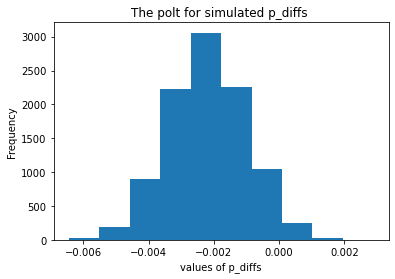

In [26]:
#we will use a histogram to plot the values of p_diffs
plt.hist(p_diffs)
plt.title("The polt for simulated p_diffs ")
plt.xlabel("values of p_diffs")
plt.ylabel("Frequency");

The histogram should be reflecting the central theory- normally distributed, the values should be around the zero as, meaning the data are not deviated from the mean. Which is reflected in the above histogram and is what the data should look like under the null hypothesis.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
#we sratrt by calculating the actual difference observed in the data set
new_con= df2[df2['landing_page'] == 'new_page']['converted'].mean()   
old_con=df2[df2['landing_page'] == 'old_page']['converted'].mean()
observed_p_diff=new_con-old_con
print('the observed p_diff in the data set is equal to: ', observed_p_diff)
#then we calculate the orportion based on the value of the observed differnce 
#and the p_diffs calculated in the pervious section
proportion_p_diff = (observed_p_diff < p_diffs).mean()
proportion_p_diff

the observed p_diff in the data set is equal to:  -0.0015782389853555567


0.3017

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

    P-value, which  is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.
    In this data set, the the new page does not reflect higher conversion rate than those of the old page. Therefore, we do not reject the null hypothesis (H0 :P𝑛𝑒𝑤 ≤ P𝑜𝑙𝑑).

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
convert_old = (df2.query("landing_page == 'old_page'")['converted']).sum()
convert_new = (df2.query("landing_page == 'new_page'")['converted']).sum()
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print("the value of z_score is:", z_score,"the value of p_value is:", p_value)

the value of z_score is: 1.3109241984234394 the value of p_value is: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

    Z-score is used to measure the standard deviations from the mean, therfore it represents the difference between our test results and the null hypothesis. Since this is an Upper-Tailed Z test, we will set the critical value to 1.645. Then in our case, the z-score= 1.3109 is less than this critical value. Meaning that the new landing page is only 1.3109 standard deviations from the conversion rate of the old landing page. Therefore, we will go with the null hypothesis and it will not be rejected.
    Additionally, the p-value=0.1899, which is not below our alpha of 0.05. Therfore, both the z-score and p-value agree with what we stated earlier, and the new page would not convert more than the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

    Since we have only 2 possible outcomes, a logistics regression will be the most suited type of regressions.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
#we start by creating a column for the intercept 
#and another one for the page, where we will create a dummy variable column for which page each user received
#we will be using the function get_dummies to create the variable
df2['intercept'] = 1
df2[['control', 'ab_page']]=pd.get_dummies(df2['group'])
df2.drop(labels=['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
logit_model = sm.Logit(df2['converted'],df2[['intercept' ,'ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
#this function provides with details on the coef., standard deviation, z-score, and p-value.
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-08-12 16:53 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

    The p-value is approximately equal to 0.190 . This value is close to the pervious value but slightly higher. 
    In the previous section, we stated that the null hypothesis is that P𝑛𝑒𝑤 ≤ P𝑜𝑙𝑑 and the alternative is P𝑛𝑒𝑤 > P𝑜𝑙𝑑. Whereas the null hypothesis in here is when the value of ab_page is equal to 1 and the converted equal to 0, while the alternative hypothesis is that when ab_page = 1, the converted is mostly equals to 1.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

    There are other factors that we might consider that may affect the individual converts. Some personal traits relating to the viewers such as the personality, loyalty level, age, gender, occupation, and income level. Other factors related to the technology may include the internt connectivity and the condition of the device used to access the website. Yet, the factors must be chosen carefully that we do not shift the focus of the studies to some areas and leave some important others.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns Provide the statistical output as well as a written response to answer this question.

In [33]:
#we use join to combine the two datasets
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [34]:
#There will be 3 dummy variables based on the countries.csv
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [35]:
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 12 Aug 2021   Pseudo R-squ.:               1.521e-05
Time:                        16:53:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

The country factor does not reflect an impact on the conversion, this is based on the p-value calculated.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [36]:
### Fit the Linear Model And Obtain the Results
mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK','ab_page']])
results = mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Aug 2021   Pseudo R-squ.:               2.323e-05
Time:                        16:53:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

In [37]:
#to intepret the results, we need first to exponeniate each value
#since some values are below 1, we will be obraining the reciprocal
print(np.exp(results.params))
print(1/np.exp(results.params))

intercept    0.136795
CA           0.960062
UK           1.009932
ab_page      0.985168
dtype: float64
intercept    7.310207
CA           1.041599
UK           0.990165
ab_page      1.015056
dtype: float64


In [38]:
#now we will obtain the values with the interaction
df_new['CA_page'] = df_new['CA']*df_new['ab_page']
df_new['UK_page'] = df_new['UK']*df_new['ab_page']
df_new['US_page'] = df_new['US']*df_new['ab_page']
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA','UK','CA_page', 'UK_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Thu, 12 Aug 2021   Pseudo R-squ.:               2.417e-05
Time:                        16:53:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0073      0.037     -0.196      0.844      -0.080       0.065
UK             0.0045      0.018      0.257      0.797      -0.030       0.039
CA_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_page        0.0108      0.023      0.475      0.635      -0.034       0.056
==============================================================================
"""

In [39]:
#to intepret the results, we need first to exponeniate each value
#since some values are below 1, we will be obraining the reciprocal
print(np.exp(results.params))
print(1/np.exp(results.params))

intercept    0.135779
CA           0.992750
UK           1.004517
CA_page      0.934776
UK_page      1.010893
dtype: float64
intercept    7.364925
CA           1.007303
UK           0.995503
CA_page      1.069775
UK_page      0.989224
dtype: float64


We are here studying the interaction between page and country to see if there significant effects on conversion. The p-value that is less than 0.05 is intercept's p-value. Whereas the p-value for ab_page is 0.191, the p-value for CA is 0.844, the p-value for UK is 0.797 . Additionally, the z-score are not large enough to reflect the impact on the conversion.

we can intepret the following:
For each 1 unit increase in CA, conversion is 1.007303 times as likely, holding all else constant.
For each 1 unit increase in UK, conversion is 1.004517 times as likely, holding all else constant.
CA and new page is 1.069775 times as likely to convert than UK and new page, holding all else constant.
For every unit for new_page decreases, convert will be 7.36% more likely to happen, holding all other varible constant. 

<a id='conclusions'></a>
## Conclusions
As the values of p-value are large and the values of z-score are not significant, this indicates that we do not have enough evidence to reject the null hypothesis, Theredore, we will accept the bull hypothesis. Meaning that the old pages are sufficient, and we do not need to shift to the new page.

### Resourses
https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column 
https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
https://towardsdatascience.com/finding-and-removing-duplicate-rows-in-pandas-dataframe-c6117668631f
https://pandas.pydata.org/docs/reference/frame.html
https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions3.html    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
    